In [1]:
from pathlib import Path
from natsort import natsorted
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
from skimage.io import imread
import cv2
import os
# Save a palette to a variable:
palette = sns.color_palette("Set2")
    
# Use palplot and pass in the variable:
sns.set_palette("Set2")

In [3]:
class cfg: 
    WORKING_DIR = Path(os.getcwd()).parent # Parent path for project 
    RELATIVE_PATH = "Data/nuinsseg" # Data Path in project path 
    BASE_PATH = WORKING_DIR / RELATIVE_PATH  # Combine Data with parent path
    fold_pathes = list(BASE_PATH.glob('*')) 
    
    yolo_train_path = 'datasets/train' # train path
    yolo_val_path = 'datasets/val' # validation path
    seed = 2024
    nfold = 0 

In [4]:
def check_list_maching(images, lables, binary): # check each image, label and binary 
    for im,la,bi in zip(images, lables, binary): 
        if im.with_suffix('').name == la.with_suffix('').name == bi.with_suffix('').name: 
            pass
        else: 
            assert print(f'Not matching same directory:{im}')
        

In [5]:
merge_df = [] 
for fold_path in cfg.fold_pathes: # all split like blander brain cardia etc...
    meta_dict = {}
    img_type, organ = fold_path.name.split(' ',1) # (species ex; human, mouse), (organtype)
    if organ == 'fat (white and brown)_subscapula': organ = 'fat_subscapula' # name is too long
    img_pathes = natsorted(fold_path.glob('tissue images/*.png')) # sorting images
    labels_pathes = natsorted(fold_path.glob('label masks/*.tif')) # sorting labels
    binary_pathes = natsorted(fold_path.glob('mask binary/*.png')) # sorting binar
    
    meta_dict['Type'] = img_type # (human, mouse .. etc)
    meta_dict['organs'] = organ # organ type 
    meta_dict['img_path'] = img_pathes # image type 
    meta_dict['label_masks'] = labels_pathes # label type 
    meta_dict['binary_path'] = binary_pathes # binary type 
    merge_df.append(pd.DataFrame(meta_dict)) # merge it to data frame 
    
df = pd.concat(merge_df).reset_index(drop=True)
class_dict = {cls_name : num for num, cls_name in enumerate(df['organs'].unique())} # number each organs 
print({v: k for k, v in  class_dict.items()})

{0: 'oesophagus', 1: 'heart', 2: 'kidney', 3: 'muscle', 4: 'femur', 5: 'spleen', 6: 'tongue', 7: 'umbilical cord', 8: 'lung', 9: 'pylorus', 10: 'peritoneum', 11: 'cerebellum', 12: 'muscle_tibia', 13: 'pancreas', 14: 'epiglottis', 15: 'thymus', 16: 'brain', 17: 'cardia', 18: 'bladder', 19: 'tonsile', 20: 'salivory gland', 21: 'testis', 22: 'melanoma', 23: 'fat_subscapula', 24: 'rectum', 25: 'placenta', 26: 'liver', 27: 'jejunum'}


<Axes: title={'center': 'Organs count plot'}, xlabel='organs', ylabel='count'>

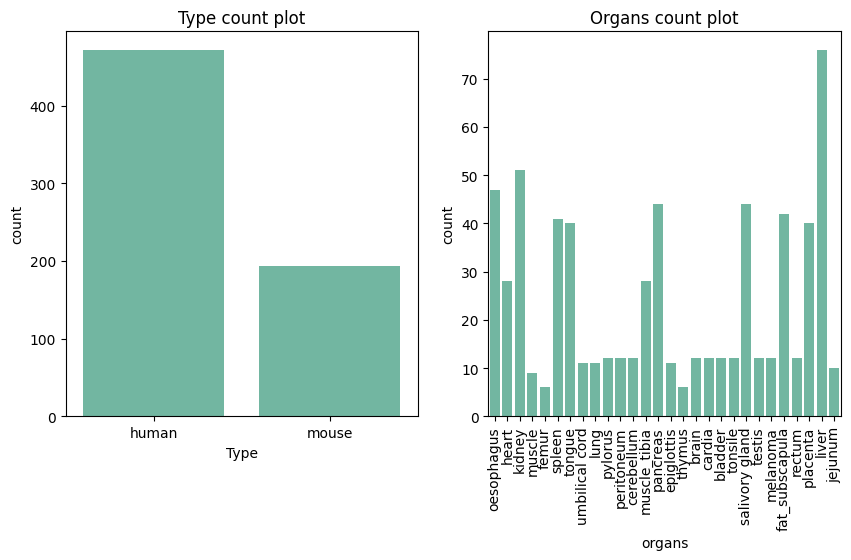

In [6]:
fig, axs = plt.subplots(1,2, figsize=(10,5)) # 
plt.xticks(rotation=90)
axs[0].set_title('Type count plot')
axs[1].set_title('Organs count plot')

sns.countplot(df, x='Type',ax=axs[0]) # two type human and mouse 
sns.countplot(df, x='organs',ax=axs[1]) # each organ type 

In [7]:
df.head() # merged dataframe 

,Type,organs,img_path,label_masks,binary_path
0,human,oesophagus,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...
1,human,oesophagus,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...
2,human,oesophagus,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...
3,human,oesophagus,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...
4,human,oesophagus,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...


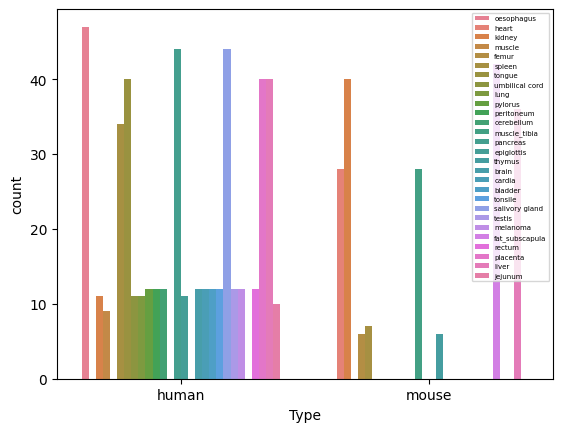

In [8]:
fig = sns.countplot(df, x='Type',hue='organs') # split human and mouse with organ
sns.move_legend(fig, "upper right", bbox_to_anchor=(.0, 1), title='Species')
plt.legend(fontsize='5')

In [9]:
# counting cell and add dataframe
df['count'], df['width'], df['height'] = 0, 0, 0
for row in tqdm(df.itertuples(), total=len(df)): 
    mask = imread(row.label_masks)
    
    df.loc[row[0], 'width']  = mask.shape[-1]
    df.loc[row[0], 'height'] = mask.shape[-2]
    df.loc[row[0], 'count']  = mask.max()


  0%|          | 0/665 [00:00<?, ?it/s]

In [11]:
print(df['width'].unique())
print(df['height'].unique())
print(df['count'].unique())

[512]
[512]
[ 19 103  35  65  45  21 141  66  18 104  17  67 138  13  52  81 227  75
  82  24   9 132  11 123  86  60 140  61 220 108  12  50  85  84 231  93
  64 152 109  28  32  43  29  14  25  20  41  22  31  55  26  15  71  44
  36  37  40  38  27  33  47 114  97  78  87  39  48  77  69  49 110  53
   8  68   7   6 171 354 327 350 288 442 575 448 587 445 479 407  63 106
  23  51 164  16  10 175  73 155 157  74 105 121  99   4   2  58 115 128
  56 143 268 426 136   5 162   3   1 107 177 174  83 117 101 119  88 144
 120  96  91  57 100  92 473 348 396 344 503 553 296 169 272 113 195 158
 153 331 237 292 311 308 324 245 242 170 137 149 161 199 135 192 147 232
  59 102 129 178 241 183 126 179 214 139 366 408 397 517 564 411 342 516
 443 369 208  95  89 172 150 111 142 145 112 127 146 173 163 125 189 166
 116 167  80  72  34  98  79  30 131  70 239 133  46  62 134 193 259 217
 250]


<Axes: xlabel='count', ylabel='organs'>

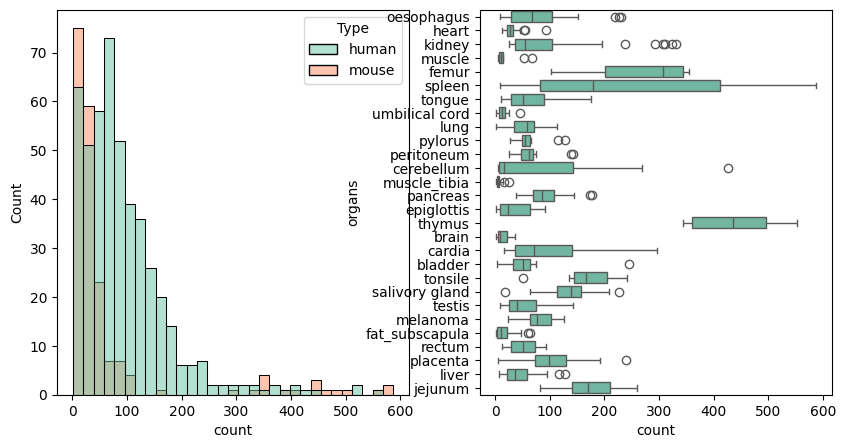

In [11]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df, x='count', hue='Type', ax=axs[0]) # count cell with type 
sns.boxplot(df, x='count', y='organs', ax=axs[1]) # count cell with organs

<Figure size 640x480 with 0 Axes>

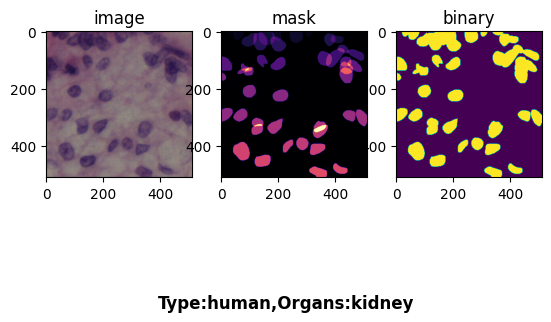

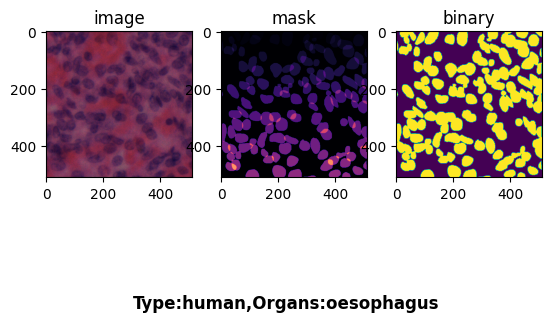

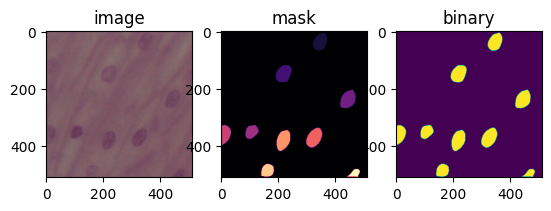

In [12]:
def show_sample(df, idx): 
    # read smaple img
    sample  = df.iloc[idx]

    plt.suptitle(f'Type:{sample.Type},Organs:{sample.organs}',fontweight ="bold", y=0.1) 

    fig, axs = plt.subplots(1,3)
    
    img     = imread(str(sample.img_path))
    lab     = imread(str(sample.label_masks))
    bi_mask = imread(str(sample.binary_path))
    
    axs[0].set_title("image")
    axs[1].set_title("mask")
    axs[2].set_title("binary")
    
    axs[0].imshow(img)
    axs[1].imshow(lab, cmap="magma")
    axs[2].imshow(bi_mask)
    
    
_=[show_sample(df, df.sample().index[0]) for i in range(3)]  # display image, mask and binary

In [13]:
df['organs'].unique() # all types of organs

array(['oesophagus', 'heart', 'kidney', 'muscle', 'femur', 'spleen',
       'tongue', 'umbilical cord', 'lung', 'pylorus', 'peritoneum',
       'cerebellum', 'muscle_tibia', 'pancreas', 'epiglottis', 'thymus',
       'brain', 'cardia', 'bladder', 'tonsile', 'salivory gland',
       'testis', 'melanoma', 'fat_subscapula', 'rectum', 'placenta',
       'liver', 'jejunum'], dtype=object)

In [14]:
df[df.loc[:,'organs'] == "umbilical cord" ] # print organs match unbilical cord

,Type,organs,img_path,label_masks,binary_path,count,width,height
177,human,umbilical cord,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,4,512,512
178,human,umbilical cord,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,2,512,512
179,human,umbilical cord,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,2,512,512
180,human,umbilical cord,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,17,512,512
181,human,umbilical cord,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,11,512,512
182,human,umbilical cord,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,45,512,512
183,human,umbilical cord,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,15,512,512
184,human,umbilical cord,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,12,512,512
185,human,umbilical cord,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,21,512,512
186,human,umbilical cord,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,/Users/kwon/Workspace/Python/cell-detection-yo...,25,512,512


<Figure size 640x480 with 0 Axes>

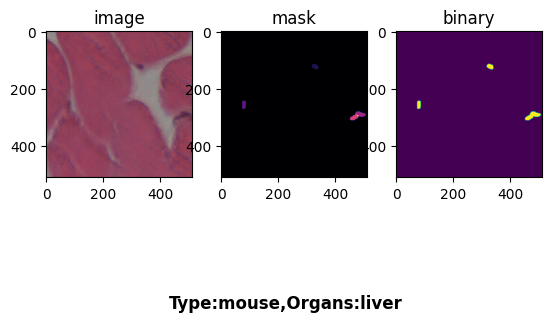

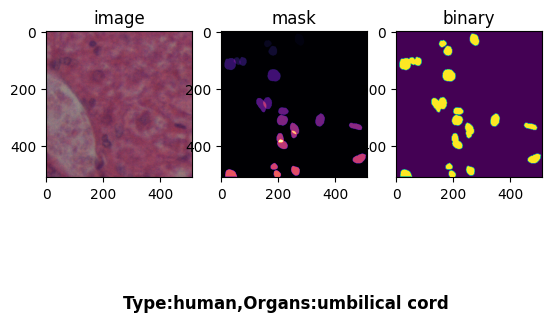

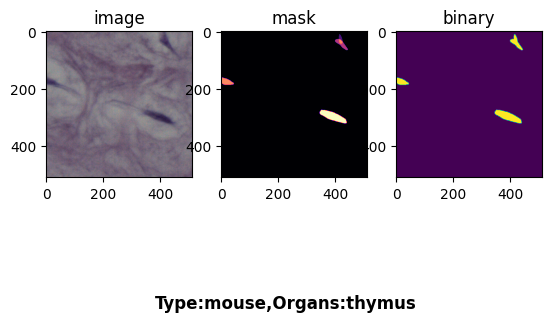

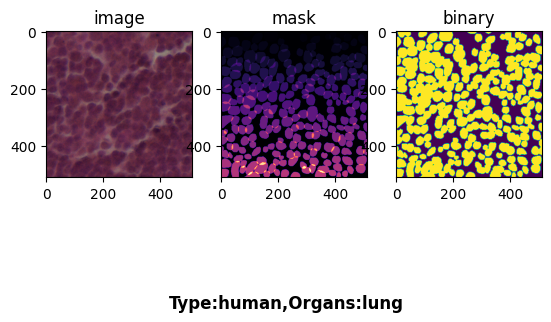

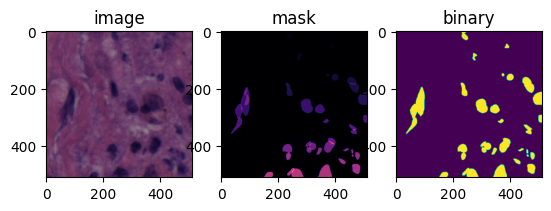

In [15]:
plot_type = ['muscle_tibia', 'liver', 'umbilical cord', 'thymus', 'lung'] # test sample of each organ
for i in plot_type:
    tmp_df = df[df.loc[:,'organs'] == i].reset_index(drop=True)
    show_sample(tmp_df, tmp_df.sample().index[0])

In [16]:
import numpy as np
def get_contour_bbox(msk): # bbox calculation
    """ Reference : https://www.kaggle.com/code/dschettler8845/train-sartorius-segmentation-eda-effdet-tf """
    """ Function to return the bounding box (tl, br) for a given mask """
    
    # Get contour(s) --> There should be only one
    assert msk.dtype == np.uint8 , "image type must uint8"
    
    cnts = cv2.findContours(msk.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    contour, hierarchy = cnts
    
    if len(contour)==0:
        return None
    else:
        contour = contour[0]
    
    # Get extreme coordinates
    tl = (tuple(contour[contour[:, :, 0].argmin()][0])[0], 
          tuple(contour[contour[:, :, 1].argmin()][0])[1])
    br = (tuple(contour[contour[:, :, 0].argmax()][0])[0], 
          tuple(contour[contour[:, :, 1].argmax()][0])[1])
    
    return tl, br

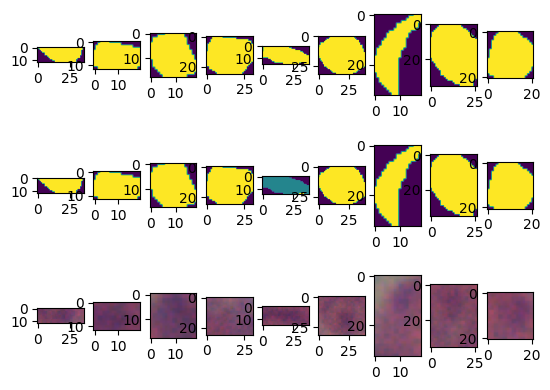

In [17]:
# Let do make bounging box

sample = df.iloc[100] 
mask = imread(sample.label_masks)
image = imread(sample.img_path)

plot_num = np.unique(mask)[:10] if len(np.unique(mask)) > 10 else np.unique(mask)

fig, axs = plt.subplots(3, len(plot_num)-1)
for i in plot_num:
    binary_img =np.where(mask==i, 1, 0).astype(np.uint8)
    min_coord, max_coord = get_contour_bbox(binary_img) # get bbox 
    xmin, ymin = min_coord
    xmax, ymax = max_coord
    
    axs[0, i-1].imshow(binary_img[ymin:ymax, xmin:xmax])
    axs[1, i-1].imshow(mask[ymin:ymax, xmin:xmax])
    axs[2, i-1].imshow(image[ymin:ymax, xmin:xmax])

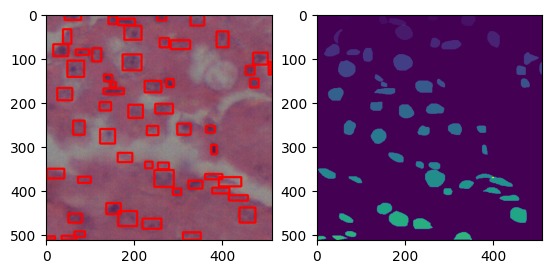

In [18]:
sample = df.iloc[100] 
mask = imread(sample.label_masks)
image = imread(sample.img_path)
fig,axs = plt.subplots(1,2)

for i in np.unique(mask)[1:]:
    binary_img =np.where(mask==i, 1, 0).astype(np.uint8)
    min_coord, max_coord = get_contour_bbox(binary_img)
    
    xmin, ymin = min_coord
    xmax, ymax = max_coord
    image = cv2.rectangle(image,(xmin,ymin),(xmax,ymax),(255,0,0),3)
    
axs[0].imshow(image)
axs[1].imshow(mask)